In [44]:
import glob
import os
import numpy as np
import numpy
from PIL import Image
import cv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [64]:
labels_dict = {'aqib_1910':0, 'harsh_1924':1, 'himraj_1925':2, 'serena_1949': 3}
# Define the path to the main folder
path = 'C:\\Users\\HP\\Desktop\\codes\\Dataset1\\Dataset_size_200'

# Get the list of subfolders in the main folder
subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
image_size = (128, 128)
# Initialize an empty list to store the images
images = []
labels = []
# Iterate over the subfolders
for subfolder in subfolders:
    label = str(subfolder).split("\\")[-1]
    # Get the list of image files in the subfolder
    image_files = glob.glob(os.path.join(subfolder, '*.jpg'))
    
    # Iterate over the image files
    for image_file in image_files:
        # Open the image file
        img = Image.open(image_file)
        img = cv2.imread(image_file)
        img = cv2.resize(img, image_size)
        # Convert the image to a numpy array
        img_array = np.array(img)
        print(img_array.shape)
        # Append the image array to the list of images
        images.append(img_array)
        labels.append(labels_dict[label])
        
    
# Convert the list of images to a numpy array
X = np.array(images)


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [65]:
X = X.reshape(X.shape[0], -1)

# Normalization

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data to have values between 0 and 1
X_normalized = scaler.transform(X)


# PCA

In [67]:
from sklearn.decomposition import PCA

# Define the number of components
n_components = 2

# Initialize the PCA
pca = PCA(n_components=n_components)

# Fit the PCA to the data
pca.fit(X_normalized)

# Transform the data
X_pca = pca.transform(X_normalized)


In [68]:
import random 
combined = list(zip(images, labels))
random.shuffle(combined)

images[:], labels[:] = zip(*combined)

# SVM Classifier

In [69]:
from sklearn.svm import SVC

# Define the class labels
#y = ["aqib_1910","harsh_1924","himraj_1925","serena_1949"]
# read the labels from the dataset
y = labels



# Initialize the SVM classifier
clf = SVC(kernel='rbf', C=1, random_state=0, gamma='auto')


# Fit the classifier to the data
clf.fit(X_pca, y)

SVC(C=1, gamma='auto', random_state=0)

In [70]:
y_pred = clf.predict(X_pca)

In [71]:
# Predict the class labels of the test set
y_pred = clf.predict(X_pca)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6115992970123023


In [72]:
precision, recall, fscore, support = precision_recall_fscore_support(y, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)

Precision: 0.7038222571423601
Recall: 0.5179734096085598
F1-score: 0.5269359318204381


In [73]:
y_pred = clf.predict(X_pca)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54       133
           1       0.64      0.68      0.66       174
           2       0.90      0.15      0.25        62
           3       0.56      0.82      0.66       200

    accuracy                           0.61       569
   macro avg       0.70      0.52      0.53       569
weighted avg       0.66      0.61      0.59       569



In [74]:
# Predict the class labels of the test set
y_pred = clf.predict(X_pca)

# Create a confusion matrix
conf_mat = confusion_matrix(y, y_pred)

print(conf_mat)

[[ 57  24   0  52]
 [  7 118   0  49]
 [  6  17   9  30]
 [  9  26   1 164]]


<AxesSubplot:>

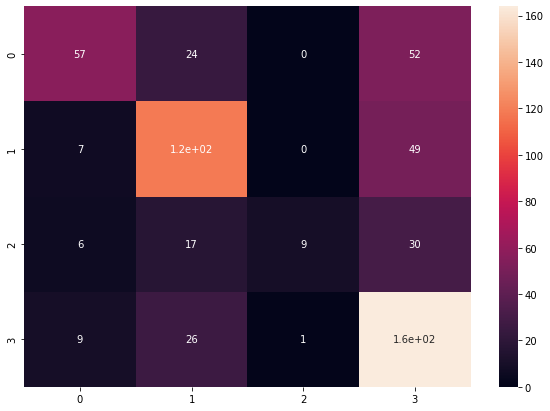

In [75]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(conf_mat.shape[0])],
                  columns = [i for i in range(conf_mat.shape[1])])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)